In [72]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Import to split the data
from sklearn.model_selection import train_test_split

# Import to preprocess the data
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

# Import to tune the hyperparameter  
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer

# Import to evaluate the model 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Importing the models needed for REGRESSION machine learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Import to visualize the results
import matplotlib.pyplot as plt

# Loading the csv as a dataset
hospitalCost_df = pd.read_csv("../CA1/Datasets/CA1-Regression-Dataset.csv")

Showing the first 5 rows of the dataset:
   ID  Age  Gender     BMI Smoker     Region     Cost ($)
0   1   19  female  27.900    yes  southwest  16884.92400
1   2   18    male  33.770     no  southeast   1725.55230
2   3   28    male  33.000     no  southeast   4449.46200
3   4   33    male  22.705     no  northwest  21984.47061
4   5   32    male  28.880     no  northwest   3866.85520

Describing the dataset:
                ID          Age          BMI      Cost ($)
count  1338.000000  1338.000000  1338.000000   1338.000000
mean    669.500000    39.207025    30.663397  13270.422265
std     386.391641    14.049960     6.098187  12110.011237
min       1.000000    18.000000    15.960000   1121.873900
25%     335.250000    27.000000    26.296250   4740.287150
50%     669.500000    39.000000    30.400000   9382.033000
75%    1003.750000    51.000000    34.693750  16639.912515
max    1338.000000    64.000000    53.130000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 

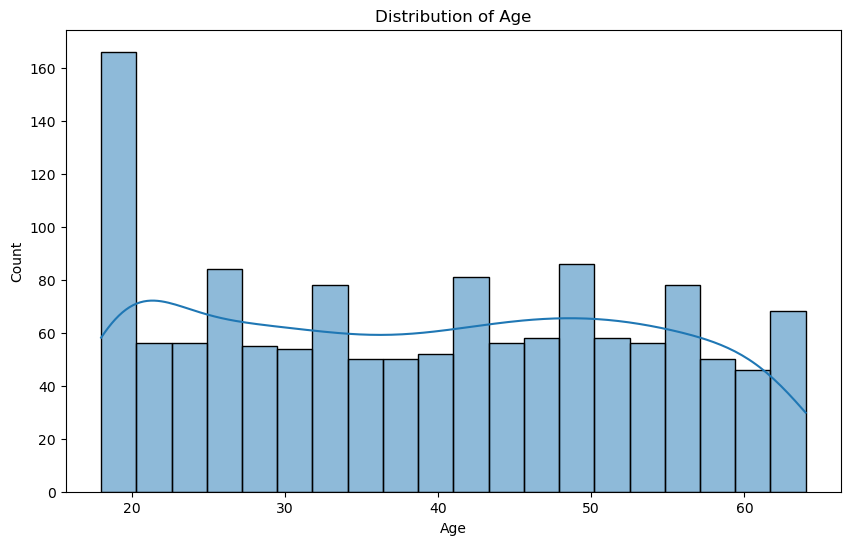

                        ID       Age       BMI  Cost ($)  Gender_male  \
ID                1.000000 -0.031467 -0.036169 -0.003373     0.003704   
Age              -0.031467  1.000000  0.109272  0.299008    -0.020856   
BMI              -0.036169  0.109272  1.000000  0.198341     0.046371   
Cost ($)         -0.003373  0.299008  0.198341  1.000000     0.057292   
Gender_male       0.003704 -0.020856  0.046371  0.057292     1.000000   
Smoker_yes        0.005217 -0.025019  0.003750  0.787251     0.076185   
Region_northwest  0.020966 -0.000407 -0.135996 -0.039905    -0.011156   
Region_southeast -0.022932 -0.011642  0.270025  0.073982     0.017117   
Region_southwest  0.007732  0.010016 -0.006205 -0.043210    -0.004184   

                  Smoker_yes  Region_northwest  Region_southeast  \
ID                  0.005217          0.020966         -0.022932   
Age                -0.025019         -0.000407         -0.011642   
BMI                 0.003750         -0.135996          0.270025 

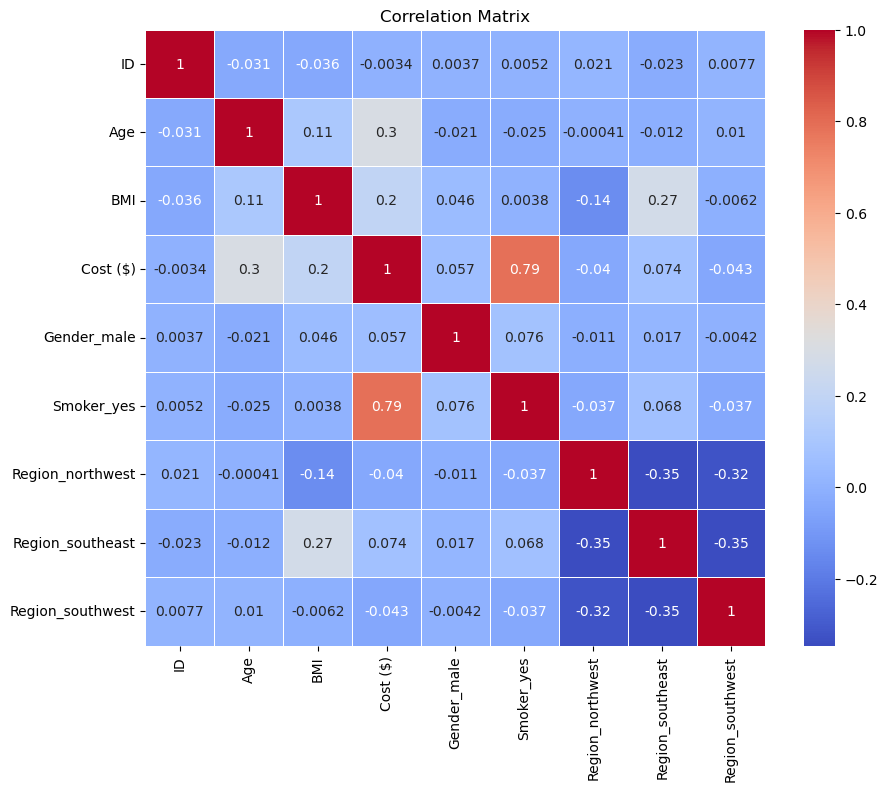

AVERAGE COST BY GENDER
Gender
female    12569.578844
male      13956.751178
Name: Cost ($), dtype: float64
AVERAGE COST BY SMOKER STATUS
Smoker
no      8434.268298
yes    32050.231832
Name: Cost ($), dtype: float64


In [94]:
# Data exploration

# Show the dataset in a table
print("Showing the first 5 rows of the dataset:")
print(hospitalCost_df.head(5))

# Describe the dataset
print("\nDescribing the dataset:")
print(hospitalCost_df.describe())

# Display basic information about the dataset
print(hospitalCost_df.info())

# Check for missing values
print(hospitalCost_df.isnull().sum())

# Distribution of Gender
print(hospitalCost_df['Gender'].value_counts())

# Distribution of Smoker
print(hospitalCost_df['Smoker'].value_counts())

# Distribution of Region
print(hospitalCost_df['Region'].value_counts())

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(hospitalCost_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(hospitalCost_df, columns=['Gender', 'Smoker', 'Region'], drop_first=True)
# Correlation matrix
correlation_matrix = df_encoded.corr()
print(correlation_matrix)
# Heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Average cost by gender
avg_cost_gender = hospitalCost_df.groupby('Gender')['Cost ($)'].mean()
print("AVERAGE COST BY GENDER")
print(avg_cost_gender)

# Average cost by smoker status
print("AVERAGE COST BY SMOKER STATUS")
avg_cost_smoker = hospitalCost_df.groupby('Smoker')['Cost ($)'].mean()
print(avg_cost_smoker)

In [74]:
# Creating the feature(X) and target(y) arrays
X = hospitalCost_df.drop(columns=['ID', 'Cost ($)'],axis=1).values
y = hospitalCost_df["Cost ($)"].values

# To check if the arrays are numpy.ndarray
print(type(X), type(y))

# Prints the dimensions of the feature and target
print(f'dimension of input feature: {X.shape}')
print(f'dimension of output target: {y.shape}')

# Display the feature array (X)
print("Feature array (X):")
print(X)

# Display the target array (y)
print("\nTarget array (y):")
print(y)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
dimension of input feature: (1338, 5)
dimension of output target: (1338,)
Feature array (X):
[[19 'female' 27.9 'yes' 'southwest']
 [18 'male' 33.77 'no' 'southeast']
 [28 'male' 33.0 'no' 'southeast']
 ...
 [18 'female' 36.85 'no' 'southeast']
 [21 'female' 25.8 'no' 'southwest']
 [61 'female' 29.07 'yes' 'northwest']]

Target array (y):
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [75]:
# Splitting the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (1070, 5)
X_test Shape: (268, 5)
y_train Shape: (1070,)
y_test Shape: (268,)


In [76]:
# Identify the indices of categorical columns
categorical_indices = [1, 3, 4]  # Indices of "Gender," "Smoker," and "Region" columns

# Create a ColumnTransformer to apply one-hot encoding to specified columns
# The remainder of the columns will be untouched
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_indices)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the test data (using the same transformer fitted on the training data)
X_test_encoded = preprocessor.transform(X_test)

# Display the shapes of the encoded training and testing sets
print("X_train_encoded Shape:", X_train_encoded.shape)
print("X_test_encoded Shape:", X_test_encoded.shape)

X_train_encoded Shape: (1070, 10)
X_test_encoded Shape: (268, 10)


In [77]:
# Use get_dummies to one-hot encode categorical columns
df_encoded = pd.get_dummies(hospitalCost_df, columns=['Gender', 'Smoker', 'Region'], drop_first=True)

print("Showing first 5 after changing categorical data:\n",df_encoded.head(5))

Showing first 5 after changing categorical data:
    ID  Age     BMI     Cost ($)  Gender_male  Smoker_yes  Region_northwest  \
0   1   19  27.900  16884.92400        False        True             False   
1   2   18  33.770   1725.55230         True       False             False   
2   3   28  33.000   4449.46200         True       False             False   
3   4   33  22.705  21984.47061         True       False              True   
4   5   32  28.880   3866.85520         True       False              True   

   Region_southeast  Region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [78]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaled training data
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transform the test data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test_encoded)

# Display the shapes of the scaled training and testing sets
print("X_train_scaled Shape:", X_train_scaled.shape)
print("X_test_scaled Shape:", X_test_scaled.shape)

X_train_scaled Shape: (1070, 10)
X_test_scaled Shape: (268, 10)


In [79]:
# Initialize the Linear Regression model
linear_model_untuned = LinearRegression()

# Train the model on the cleaned training data
linear_model_untuned.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_linreg = linear_model_untuned.predict(X_test_scaled)

# Evaluate the model performance
mse_linreg_untuned = mean_squared_error(y_test, y_pred_linreg)
rmse_linreg_untuned = np.sqrt(mse_linreg_untuned)  # RMSE is the square root of MSE
mae_linreg_untuned = mean_absolute_error(y_test, y_pred_linreg)
mape_linreg_untuned = np.mean(np.abs((y_test - y_pred_linreg) / y_test)) * 100
r2_linreg_untuned = r2_score(y_test, y_pred_linreg)

# Display the evaluation metrics
print(f"Linear Regression - Mean Squared Error: {mse_linreg_untuned:.3f}")
print(f"Linear Regression - Root Mean Squared Error: {rmse_linreg_untuned:.3f}")
print(f"Linear Regression - Mean Absolute Error: {mae_linreg_untuned:.3f}")
print(f"Linear Regression - Mean Absolute Percentage Error: {mape_linreg_untuned:.3f}%")
print(f"Linear Regression - R^2 Score: {r2_linreg_untuned:.3f}")


Linear Regression - Mean Squared Error: 34141371.497
Linear Regression - Root Mean Squared Error: 5843.062
Linear Regression - Mean Absolute Error: 4223.485
Linear Regression - Mean Absolute Percentage Error: 48.405%
Linear Regression - R^2 Score: 0.780


In [80]:
# Initialize Ridge Regression model
ridge_model_untuned = Ridge(alpha=1.0)  # You can adjust the value of alpha

# Train the model on the scaled training data
ridge_model_untuned.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model_untuned.predict(X_test_scaled)

# Evaluate the model performance
mse_ridge_untuned = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge_untuned = np.sqrt(mse_ridge_untuned)
mae_ridge_untuned = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge_untuned = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100
r2_ridge_untuned = r2_score(y_test, y_pred_ridge)


# Display the evaluation metrics for Ridge Regression
print(f"Ridge Regression - Mean Squared Error: {mse_ridge_untuned:.3f}")
print(f"Ridge Regression - Root Mean Squared Error: {rmse_ridge_untuned:.3f}")
print(f"Ridge Regression - Mean Absolute Error: {mae_ridge_untuned:.3f}")
print(f"Ridge Regression - Mean Absolute Percentage Error: {mape_ridge_untuned:.3f}%")
print(f"Ridge Regression - R^2 Score: {r2_ridge_untuned:.3f}")

Ridge Regression - Mean Squared Error: 34146016.956
Ridge Regression - Root Mean Squared Error: 5843.459
Ridge Regression - Mean Absolute Error: 4223.656
Ridge Regression - Mean Absolute Percentage Error: 48.485%
Ridge Regression - R^2 Score: 0.780


In [81]:
# Initialize Ridge Regression model
ridge_model = Ridge()

# Define the hyperparameter grid
param_grid = {
    'alpha': np.logspace(-4, 4, 100),  # Adjust the range as needed
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    ridge_model,
    param_distributions=param_grid,
    n_iter=10,  # Adjust the number of iterations
    scoring='neg_mean_squared_error',  # You can use other scoring metrics as well
    cv=5,  # Adjust the number of cross-validation folds
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Use the best hyperparameters to train the final model
final_ridge_model = Ridge(**best_params)
final_ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = final_ridge_model.predict(X_test_scaled)

# Evaluate the model performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display the evaluation metrics for Ridge Regression
print(f"Ridge Regression - Mean Squared Error: {mse_ridge:.3f}")
print(f"Ridge Regression - Root Mean Squared Error: {rmse_ridge:.3f}")
print(f"Ridge Regression - Mean Absolute Error: {mae_ridge:.3f}")
print(f"Ridge Regression - Mean Absolute Percentage Error: {mape_ridge:.3f}%")
print(f"Ridge Regression - R^2 Score: {r2_ridge:.3f}")

# Display the best hyperparameters
print("Best Hyperparameters:", best_params)

Ridge Regression - Mean Squared Error: 34149434.178
Ridge Regression - Root Mean Squared Error: 5843.752
Ridge Regression - Mean Absolute Error: 4224.342
Ridge Regression - Mean Absolute Percentage Error: 48.512%
Ridge Regression - R^2 Score: 0.780
Best Hyperparameters: {'alpha': 1.9179102616724888}


In [82]:
# Initialize the Lasso Regression model
lasso_model_untuned = Lasso(alpha=1.0)  # You can adjust the value of alpha

# Train the model on the scaled training data
lasso_model_untuned.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model_untuned.predict(X_test_scaled)

# Evaluate the model performance
mse_lasso_untuned = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso_untuned = np.sqrt(mse_lasso_untuned)
mae_lasso_untuned = mean_absolute_error(y_test, y_pred_lasso)
mape_lasso_untuned = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100
r2_lasso_untuned = r2_score(y_test, y_pred_lasso)

# Display the evaluation metrics for Lasso Regression
print(f"Lasso Regression - Mean Squared Error: {mse_lasso_untuned:.3f}")
print(f"Lasso Regression - Root Mean Squared Error: {rmse_lasso_untuned:.3f}")
print(f"Lasso Regression - Mean Absolute Error: {mae_lasso_untuned:.3f}")
print(f"Lasso Regression - Mean Absolute Percentage Error: {mape_lasso_untuned:.3f}%")
print(f"Lasso Regression - R^2 Score: {r2_lasso_untuned:.3f}")

Lasso Regression - Mean Squared Error: 34145275.557
Lasso Regression - Root Mean Squared Error: 5843.396
Lasso Regression - Mean Absolute Error: 4223.137
Lasso Regression - Mean Absolute Percentage Error: 48.467%
Lasso Regression - R^2 Score: 0.780


In [83]:
# Initialize Lasso Regression model
lasso_model = Lasso()

# Define the hyperparameter grid
param_grid = {
    'alpha': np.logspace(-4, 4, 100),  # Adjust the range as needed
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    lasso_model,
    param_distributions=param_grid,
    n_iter=5,  # Adjust the number of iterations
    scoring='neg_mean_squared_error',  # You can use other scoring metrics as well
    cv=5,  # Adjust the number of cross-validation folds
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Use the best hyperparameters to train the final model
final_lasso_model = Lasso(**best_params)
final_lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lasso = final_lasso_model.predict(X_test_scaled)

# Evaluate the model performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mape_lasso = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display the evaluation metrics for Lasso Regression
print(f"Lasso Regression - Mean Squared Error: {mse_lasso:.3f}")
print(f"Lasso Regression - Root Mean Squared Error: {rmse_lasso:.3f}")
print(f"Lasso Regression - Mean Absolute Error: {mae_lasso:.3f}")
print(f"Lasso Regression - Mean Absolute Percentage Error: {mape_lasso:.3f}%")
print(f"Lasso Regression - R^2 Score: {r2_lasso:.3f}")

# Display the best hyperparameters
print("Best Hyperparameters:", best_params)

Lasso Regression - Mean Squared Error: 34290251.071
Lasso Regression - Root Mean Squared Error: 5855.788
Lasso Regression - Mean Absolute Error: 4233.218
Lasso Regression - Mean Absolute Percentage Error: 48.853%
Lasso Regression - R^2 Score: 0.779
Best Hyperparameters: {'alpha': 45.34878508128591}


In [84]:
# Initialize the KNN Regressor model
knn_model_untuned = KNeighborsRegressor(n_neighbors=5)  # You can adjust the value of n_neighbors

# Train the model on the scaled training data
knn_model_untuned.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model_untuned.predict(X_test_scaled)

# Evaluate the model performance
mse_knn_untuned = mean_squared_error(y_test, y_pred_knn)
rmse_knn_untuned = np.sqrt(mse_knn_untuned)
mae_knn_untuned = mean_absolute_error(y_test, y_pred_knn)
mape_knn_untuned = np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100
r2_knn_untuned = r2_score(y_test, y_pred_knn)

# Display the evaluation metrics for KNN
print(f"KNN - Mean Squared Error: {mse_knn_untuned:.3f}")
print(f"KNN - Root Mean Squared Error: {rmse_knn_untuned:.3f}")
print(f"KNN - Mean Absolute Error: {mae_knn_untuned:.3f}")
print(f"KNN - Mean Absolute Percentage Error: {mape_knn_untuned:.3f}%")
print(f"KNN - R^2 Score: {r2_knn_untuned:.3f}")


KNN - Mean Squared Error: 29040842.360
KNN - Root Mean Squared Error: 5388.956
KNN - Mean Absolute Error: 3446.375
KNN - Mean Absolute Percentage Error: 48.854%
KNN - R^2 Score: 0.813


In [85]:
# Initialize the KNN Regressor model
knn_model = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': range(1, 21),  # Adjust the range as needed
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    knn_model,
    param_distributions=param_grid,
    n_iter=10,  # Adjust the number of iterations
    scoring='neg_mean_squared_error',  # You can use other scoring metrics as well
    cv=5,  # Adjust the number of cross-validation folds
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Use the best hyperparameters to train the final model
final_knn_model = KNeighborsRegressor(**best_params)
final_knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = final_knn_model.predict(X_test_scaled)

# Evaluate the model performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mape_knn = np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100
r2_knn = r2_score(y_test, y_pred_knn)

# Display the evaluation metrics for KNN
print(f"KNN - Mean Squared Error: {mse_knn:.3f}")
print(f"KNN - Root Mean Squared Error: {rmse_knn:.3f}")
print(f"KNN - Mean Absolute Error: {mae_knn:.3f}")
print(f"KNN - Mean Absolute Percentage Error: {mape_knn:.3f}%")
print(f"KNN - R^2 Score: {r2_knn:.3f}")


# Display the best hyperparameters
print("Best Hyperparameters:", best_params)

KNN - Mean Squared Error: 29040842.360
KNN - Root Mean Squared Error: 5388.956
KNN - Mean Absolute Error: 3446.375
KNN - Mean Absolute Percentage Error: 48.854%
KNN - R^2 Score: 0.813
Best Hyperparameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 5}


In [86]:
# Initialize the Decision Tree Regressor model
dt_model_untuned = DecisionTreeRegressor(random_state=42)  # You can adjust other hyperparameters as needed

# Train the model on the scaled training data
dt_model_untuned.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_model_untuned.predict(X_test_scaled)

# Evaluate the model performance
mse_dt_untuned = mean_squared_error(y_test, y_pred_dt)
rmse_dt_untuned = np.sqrt(mse_dt_untuned)
mae_dt_untuned = mean_absolute_error(y_test, y_pred_dt)
mape_dt_untuned = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100
r2_dt_untuned = r2_score(y_test, y_pred_dt)

# Display the evaluation metrics for Decision Tree
print(f"Decision Tree - Mean Squared Error: {mse_dt_untuned:.3f}")
print(f"Decision Tree - Root Mean Squared Error: {rmse_dt_untuned:.3f}")
print(f"Decision Tree - Mean Absolute Error: {mae_dt_untuned:.3f}")
print(f"Decision Tree - Mean Absolute Percentage Error: {mape_dt_untuned:.3f}%")
print(f"Decision Tree - R^2 Score: {r2_dt_untuned:.3f}")


Decision Tree - Mean Squared Error: 42740338.547
Decision Tree - Root Mean Squared Error: 6537.610
Decision Tree - Mean Absolute Error: 3191.397
Decision Tree - Mean Absolute Percentage Error: 37.872%
Decision Tree - R^2 Score: 0.725


In [87]:
# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Adjust the range as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'log2', 'sqrt', 0.5, 0.8]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    dt_model,
    param_distributions=param_grid,
    n_iter=10,  # Adjust the number of iterations
    scoring='neg_mean_squared_error',  # You can use other scoring metrics as well
    cv=5,  # Adjust the number of cross-validation folds
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Use the best hyperparameters to train the final model
final_dt_model = DecisionTreeRegressor(**best_params, random_state=42)
final_dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = final_dt_model.predict(X_test_scaled)

# Evaluate the model performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mape_dt = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100
r2_dt = r2_score(y_test, y_pred_dt)

# Display the evaluation metrics for Decision Tree
print(f"Decision Tree - Mean Squared Error: {mse_dt:.3f}")
print(f"Decision Tree - Root Mean Squared Error: {rmse_dt:.3f}")
print(f"Decision Tree - Mean Absolute Error: {mae_dt:.3f}")
print(f"Decision Tree - Mean Absolute Percentage Error: {mape_dt:.3f}%")
print(f"Decision Tree - R^2 Score: {r2_dt:.3f}")


# Display the best hyperparameters
print("Best Hyperparameters:", best_params)

Decision Tree - Mean Squared Error: 30885175.638
Decision Tree - Root Mean Squared Error: 5557.443
Decision Tree - Mean Absolute Error: 3133.977
Decision Tree - Mean Absolute Percentage Error: 44.352%
Decision Tree - R^2 Score: 0.801
Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': 10}


In [88]:
# Initialize the Random Forest Regressor model
rf_model_untuned = RandomForestRegressor(random_state=42)

# Train the model on the scaled training data
rf_model_untuned.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf_untuned = rf_model_untuned.predict(X_test_scaled)

# Evaluate the model performance
mse_rf_untuned = mean_squared_error(y_test, y_pred_rf_untuned)
rmse_rf_untuned = np.sqrt(mse_rf_untuned)
mae_rf_untuned = mean_absolute_error(y_test, y_pred_rf_untuned)
mape_rf_untuned = np.mean(np.abs((y_test - y_pred_rf_untuned) / y_test)) * 100
r2_rf_untuned = r2_score(y_test, y_pred_rf_untuned)

# Display the evaluation metrics for Random Forest
print(f"Random Forest - Mean Squared Error: {mse_rf_untuned:.3f}")
print(f"Random Forest - Root Mean Squared Error: {rmse_rf_untuned:.3f}")
print(f"Random Forest - Mean Absolute Error: {mae_rf_untuned:.3f}")
print(f"SVR - Mean Absolute Percentage Error: {mape_rf_untuned:.3f}%")
print(f"Random Forest - R^2 Score: {r2_rf_untuned:.3f}")

Random Forest - Mean Squared Error: 23552966.307
Random Forest - Root Mean Squared Error: 4853.140
Random Forest - Mean Absolute Error: 2712.799
SVR - Mean Absolute Percentage Error: 36.650%
Random Forest - R^2 Score: 0.848


In [89]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'log2', 'sqrt', 0.5, 0.8]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Adjust the number of iterations
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Use the best hyperparameters to train the final model
final_rf_model = RandomForestRegressor(**best_params, random_state=42)
final_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = final_rf_model.predict(X_test_scaled)

# Evaluate the model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

# Display the evaluation metrics for Random Forest
print(f"Random Forest - Mean Squared Error: {mse_rf:.3f}")
print(f"Random Forest - Root Mean Squared Error: {rmse_rf:.3f}")
print(f"Random Forest - Mean Absolute Error: {mae_rf:.3f}")
print(f"SVR - Mean Absolute Percentage Error: {mape_rf:.3f}%")
print(f"Random Forest - R^2 Score: {r2_rf:.3f}")

# Display the best hyperparameters
print("Best Hyperparameters:", best_params)

Random Forest - Mean Squared Error: 21074000.614
Random Forest - Root Mean Squared Error: 4590.643
Random Forest - Mean Absolute Error: 2591.646
SVR - Mean Absolute Percentage Error: 35.421%
Random Forest - R^2 Score: 0.864
Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': 10}


In [90]:
# Initialize the Support Vector Regressor model
svr_model_untuned = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'poly', or 'rbf'

# Train the model on the scaled training data
svr_model_untuned.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svr = svr_model_untuned.predict(X_test_scaled)

# Evaluate the model performance
mse_svr_untuned = mean_squared_error(y_test, y_pred_svr)
rmse_svr_untuned = np.sqrt(mse_svr_untuned)
mae_svr_untuned = mean_absolute_error(y_test, y_pred_svr)
mape_svr_untuned = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
r2_svr_untuned = r2_score(y_test, y_pred_svr)

# Display the evaluation metrics for SVR
print(f"SVR - Mean Squared Error: {mse_svr_untuned:.3f}")
print(f"SVR - Root Mean Squared Error: {rmse_svr_untuned:.3f}")
print(f"SVR - Mean Absolute Error: {mae_svr_untuned:.3f}")
print(f"SVR - Mean Absolute Percentage Error: {mape_svr_untuned:.3f}%")
print(f"SVR - R^2 Score: {r2_svr_untuned:.3f}")

SVR - Mean Squared Error: 140393723.587
SVR - Root Mean Squared Error: 11848.786
SVR - Mean Absolute Error: 7763.735
SVR - Mean Absolute Percentage Error: 98.571%
SVR - R^2 Score: 0.096


In [91]:
# Initialize the Support Vector Regressor model
svr_model = SVR()

# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Adjust the range as needed
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],  # Applicable only for the 'poly' kernel
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Applicable for 'poly' and 'rbf' kernels
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    svr_model,
    param_distributions=param_grid,
    n_iter=10,  # Adjust the number of iterations
    scoring='neg_mean_squared_error',  # You can use other scoring metrics as well
    cv=5,  # Adjust the number of cross-validation folds
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Use the best hyperparameters to train the final model
final_svr_model = SVR(**best_params)
final_svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svr = final_svr_model.predict(X_test_scaled)

# Evaluate the model performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
r2_svr = r2_score(y_test, y_pred_svr)

# Display the evaluation metrics for SVR
print(f"SVR - Mean Squared Error: {mse_svr:.3f}")
print(f"SVR - Root Mean Squared Error: {rmse_svr:.3f}")
print(f"SVR - Mean Absolute Error: {mae_svr:.3f}")
print(f"SVR - Mean Absolute Percentage Error: {mape_svr:.3f}%")
print(f"SVR - R^2 Score: {r2_svr:.3f}")

# Display the best hyperparameters
print("Best Hyperparameters:", best_params)

SVR - Mean Squared Error: 101642441.301
SVR - Root Mean Squared Error: 10081.788
SVR - Mean Absolute Error: 6743.399
SVR - Mean Absolute Percentage Error: 94.793%
SVR - R^2 Score: 0.345
Best Hyperparameters: {'kernel': 'poly', 'gamma': 'auto', 'degree': 2, 'C': 100.0}


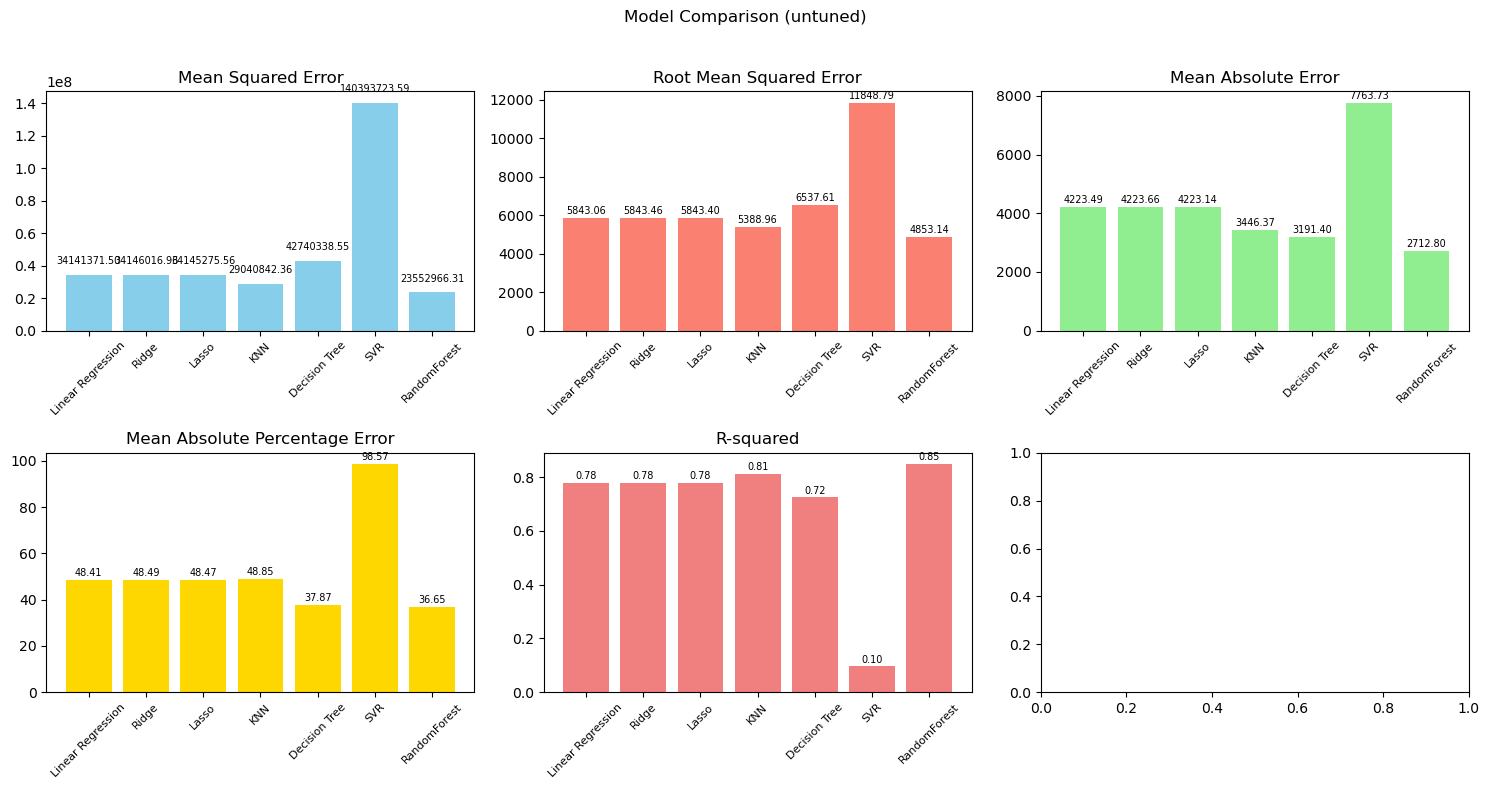

In [92]:
# Comparison of models that have not been improved
# List of model names
models = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree', 'SVR', 'RandomForest']

# List of performance metrics for each model
mse_scores = [mse_linreg_untuned, mse_ridge_untuned, mse_lasso_untuned, mse_knn_untuned, mse_dt_untuned, mse_svr_untuned, mse_rf_untuned]
rmse_scores = [rmse_linreg_untuned, rmse_ridge_untuned, rmse_lasso_untuned, rmse_knn_untuned, rmse_dt_untuned, rmse_svr_untuned, rmse_rf_untuned]
mae_scores = [mae_linreg_untuned, mae_ridge_untuned, mae_lasso_untuned, mae_knn_untuned, mae_dt_untuned, mae_svr_untuned, mae_rf_untuned]
mape_scores = [mape_linreg_untuned, mape_ridge_untuned, mape_lasso_untuned, mape_knn_untuned, mape_dt_untuned, mape_svr_untuned, mape_rf_untuned]
r2_scores = [r2_linreg_untuned, r2_ridge_untuned, r2_lasso_untuned, r2_knn_untuned, r2_dt_untuned, r2_svr_untuned, r2_rf_untuned]

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Model Comparison (untuned)')

# Function to add values on top of bars with adjusted offset
def add_values_on_top(ax, offset):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, offset), textcoords='offset points', fontsize=7)

# Mean Squared Error
axs[0, 0].bar(models, mse_scores, color='skyblue')
axs[0, 0].set_title('Mean Squared Error')
add_values_on_top(axs[0, 0], offset=10)  # Adjust the offset here
axs[0, 0].tick_params(axis='x', labelrotation=45, labelsize=8)  # Adjust label rotation and size here

# Root Mean Squared Error
axs[0, 1].bar(models, rmse_scores, color='salmon')
axs[0, 1].set_title('Root Mean Squared Error')
add_values_on_top(axs[0, 1], offset=5)  # Adjust the offset here
axs[0, 1].tick_params(axis='x', labelrotation=45, labelsize=8)  # Adjust label rotation and size here

# Mean Absolute Error
axs[0, 2].bar(models, mae_scores, color='lightgreen')
axs[0, 2].set_title('Mean Absolute Error')
add_values_on_top(axs[0, 2], offset=5)  # Adjust the offset here
axs[0, 2].tick_params(axis='x', labelrotation=45, labelsize=8)  # Adjust label rotation and size here

# Mean Absolute Percentage Error
axs[1, 0].bar(models, mape_scores, color='gold')
axs[1, 0].set_title('Mean Absolute Percentage Error')
add_values_on_top(axs[1, 0], offset=5)  # Adjust the offset here
axs[1, 0].tick_params(axis='x', labelrotation=45, labelsize=8)  # Adjust label rotation and size here

# R-squared
axs[1, 1].bar(models, r2_scores, color='lightcoral')
axs[1, 1].set_title('R-squared')
add_values_on_top(axs[1, 1], offset=5)  # Adjust the offset here
axs[1, 1].tick_params(axis='x', labelrotation=45, labelsize=8)  # Adjust label rotation and size here

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

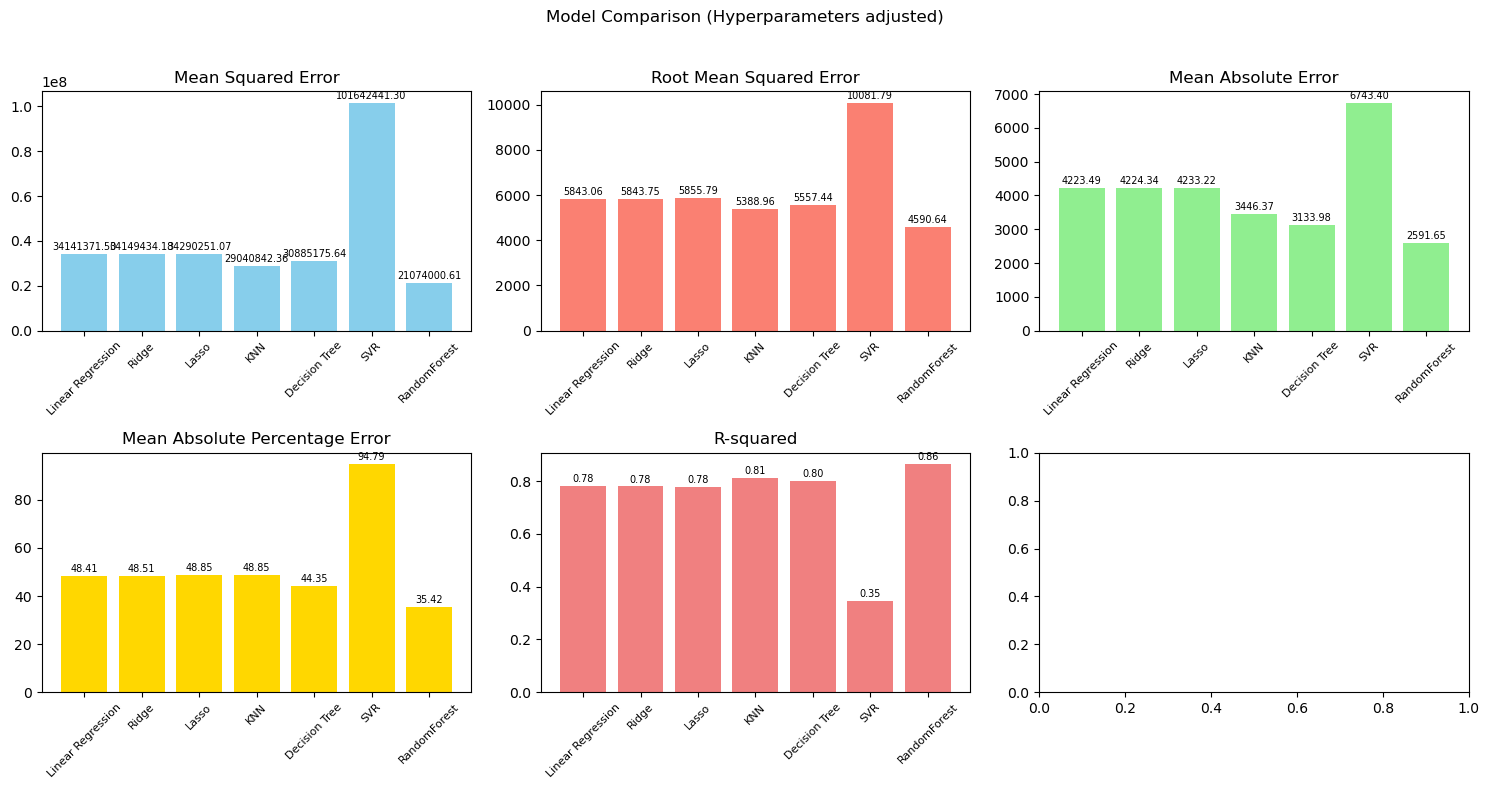

In [93]:
import matplotlib.pyplot as plt

# List of model names
models = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree', 'SVR', 'RandomForest']

# List of performance metrics for each model
mse_scores = [mse_linreg_untuned, mse_ridge, mse_lasso, mse_knn, mse_dt, mse_svr, mse_rf]
rmse_scores = [rmse_linreg_untuned, rmse_ridge, rmse_lasso, rmse_knn, rmse_dt, rmse_svr, rmse_rf]
mae_scores = [mae_linreg_untuned, mae_ridge, mae_lasso, mae_knn, mae_dt, mae_svr, mae_rf]
mape_scores = [mape_linreg_untuned, mape_ridge, mape_lasso, mape_knn, mape_dt, mape_svr, mape_rf]
r2_scores = [r2_linreg_untuned, r2_ridge, r2_lasso, r2_knn, r2_dt, r2_svr, r2_rf]

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Model Comparison (Hyperparameters adjusted)')

# Function to add values on top of bars with adjusted offset
def add_values_on_top(ax, offset):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, offset), textcoords='offset points', fontsize=7)

# Mean Squared Error
axs[0, 0].bar(models, mse_scores, color='skyblue')
axs[0, 0].set_title('Mean Squared Error')
add_values_on_top(axs[0, 0], offset=5)  # Adjust the offset here
axs[0, 0].tick_params(axis='x', labelrotation=45, labelsize=8)  # Adjust label rotation and size here

# Root Mean Squared Error
axs[0, 1].bar(models, rmse_scores, color='salmon')
axs[0, 1].set_title('Root Mean Squared Error')
add_values_on_top(axs[0, 1], offset=5)  # Adjust the offset here
axs[0, 1].tick_params(axis='x', labelrotation=45, labelsize=8)  # Adjust label rotation and size here

# Mean Absolute Error
axs[0, 2].bar(models, mae_scores, color='lightgreen')
axs[0, 2].set_title('Mean Absolute Error')
add_values_on_top(axs[0, 2], offset=5)  # Adjust the offset here
axs[0, 2].tick_params(axis='x', labelrotation=45, labelsize=8)  # Adjust label rotation and size here

# Mean Absolute Percentage Error
axs[1, 0].bar(models, mape_scores, color='gold')
axs[1, 0].set_title('Mean Absolute Percentage Error')
add_values_on_top(axs[1, 0], offset=5)  # Adjust the offset here
axs[1, 0].tick_params(axis='x', labelrotation=45, labelsize=8)  # Adjust label rotation and size here

# R-squared
axs[1, 1].bar(models, r2_scores, color='lightcoral')
axs[1, 1].set_title('R-squared')
add_values_on_top(axs[1, 1], offset=5)  # Adjust the offset here
axs[1, 1].tick_params(axis='x', labelrotation=45, labelsize=8)  # Adjust label rotation and size here

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# CA1 Regression report:

***

## Background exploration/research:
- **Age:** Age is a common factor influencing health insurance costs. Older individuals often face higher insurance premiums due to increased health risks.
- **Gender:** Gender may impact health insurance costs, as certain health conditions and risks can vary between males and females.
- **BMI (Body Mass Index):** BMI is a measure of body fat based on an individual's weight and height. High BMI values may be associated with higher health risks, potentially affecting insurance costs.
- **Smoker:** Smoking is a significant factor influencing health insurance premiums. Smokers are generally charged higher premiums due to the increased health risks associated with tobacco use.
- **Region:** The geographical region can influence healthcare costs due to variations in the cost of living, healthcare infrastructure, and regional health trends.
- **Cost ($):** This column likely represents the health insurance cost for each individual. The cost is influenced by various factors, including age, gender, BMI, smoking status, and regional variations in healthcare expenses.

- Overall, this dataset could be used to explore the relationships between these factors and the health insurance costs of individuals. Potential analyses might include:
  - Examining the distribution of insurance costs.
  - Investigating how age, gender, BMI, and smoking status correlate with insurance costs.
  - Comparing average insurance costs between different regions.
  - Creating predictive models to estimate insurance costs based on the available variables.

***

#### 1. How is your prediction task defined? And what is the meaning of the output variable?

- The output variable/target is the variable you are trying to predict. In this case, it is the hospital cost ($).
- Our prediction task is the prediction of hospital cost ($) based on various patient information, such as ID, Age, Gender, BMI, etc.

***

#### 2. Did you process the features in any way?

Preprocessing of the data was done before the data was used for the different classification in machine learning. Some of the preprocessing ways are:
- Dealing with categorical values
  - By using ```from sklearn.preprocessing import OneHotEncoder```, I dealt with the categorical values by changing it into binary data which can be used by the regression models.
- Scaling of the values
  - By using ```from sklearn.preprocessing import StandardScaler```. Certain models such as Knn are sensitive to outliers, hence by scaling the data, the performance and accuracy of these models would be improved.

***

#### 3. How did you select which learning algorithms to use?

As different learning algorithms perform differently based on the nature of the data and the problem at hand, selecting a model is important. Therefore, I have selected these models these models.

After consideration, the models I have used are:
- Linear Regression
  - Pros:
      - It is easy to understand, implement and interpret. 
      - It is also computationally efficient.
  - Cons:
    - It is sensitive to outliers and can be difficult to select the right independent variables.
    - It assumes that the relationship between the independent variables and the target variable is linear and will have problems if it is not.

- K-Nearest Neighbours
  - Pros:
    - It is easy to understand and implement.
    - It is non-parametric, so it does not make any assumptions about the underlying distribution of the data and can handle complex relationships between the independent variables and the target variable.
  - Cons:
    - It can be computationally expensive, especially for large datasets.
    - It is sensitive to outliers.
    - The choice of the value of K can have a significant impact on the performance of the algorithm.

- Decision Tree Regression
  - Pros:
    - Easy to understand and interpret.
    - Robust to outliers and noise in the data.
    - Can handle non-linear relationships between features and target variables.
  - Cons:
    - Prone to overfitting if not properly pruned.
    - Can be computationally expensive for large datasets.
    - Not as accurate as more complex models for some tasks.

- Support Vector Machines (SVR)
  - Pros:
    - Effective for handling non-linear relationships between input features and target variable.
    - Robust to outliers and noise in the data.
    - Able to handle high-dimensional data spaces.
  - Cons:
    - Computationally expensive for large datasets.
    - Sensitive to the choice of hyperparameters, particularly the regularization parameter.
    - May not be as interpretable as other regression models.

- Random Forest
  - Pros:
    - Reduces overfitting and improves generalizability
    - Provides feature importance measures
    - Can handle high-dimensional data spaces
    - Robust to outliers and noise in the data
    - Handles non-linear relationships between features and target variables
  - Cons:
    - Computationally expensive for large datasets.
    - Can be sensitive to the number of trees and other hyperparameters
    - Not as interpretable as individual decision trees

***

#### 4. Did you try to tune the hyperparameters of the learning algorithm, and in that case how?

Hyperparameter tuning is the process of selecting the best values for the hyperparameters of a machine learning model. This is crucial for optimizing the performance of the model, as different values can lead to significant differences in accuracy, generalization, and other performance metrics. Different learning models also have different hyperparameters that can be adjusted and set. 

The hyperparameters/techniques I have set/used for each respective model are:
- Linear Regression
  - Ridge regression
    - Used to mitigate the effects of multicollinearity, which occurs when independent variables in a regression model are highly correlated
  - Lasso regression
    - Used to penalize large coefficients, encouraging the model to select a smaller subset of relevant features and shrinking less significant ones towards zero.
- K-Nearest Neighbours
  - n_neighbors:
    - This parameter determines the number of nearest neighbors to consider when making predictions. A larger value of n_neighbors tends to smooth out noise and provide more stable predictions, but it may also increase the risk of overfitting.
  - weights:
    - This parameter specifies how to weight the contributions of the nearest neighbors when making predictions. 
  - Distance Metric: 
    - This hyperparameter determines how the distance between two data points is calculated. 
- Naive Bayes
  - var_smoothing:
    - This parameter controls the smoothing of the variances used for estimating the probability of each feature given each class. A higher value of var_smoothing adds more weight to the overall variance of the data, preventing the model from overfitting to specific data points. 

- Support Vector Machines (SVR)
  - C:
    - This parameter controls the regularization strength of the SVM model. A higher value of C leads to a stronger penalty for misclassification errors, which can help prevent overfitting but may also reduce the model's generalization ability. A lower value of C leads to a weaker penalty and may allow the model to better capture complex patterns in the data.
  - kernel:
    - This parameter specifies the kernel function used to map the data into a higher-dimensional space, where the data can be separated more easily by a linear hyperplane.
  - gamma:
    - This parameter is used with the 'rbf' and 'sigmoid' kernels to control the width of the Gaussian radial basis function or the sigmoid function. A higher value of gamma leads to a narrower kernel, which means that the model will focus more on local patterns in the data. A lower value of gamma leads to a wider kernel, which means that the model will consider more global patterns in the data. 

- Decision Tree/Random Forest
  - n_estimators:
    - This parameter determines the number of decision trees to build in the random forest. A higher number of trees generally leads to better performance, but it also increases the computational cost. 
  - max_depth:
    - This parameter controls the maximum depth of each decision tree in the random forest. A deeper tree can capture more complex patterns in the data, but it is also more prone to overfitting. A shallower tree may not capture all the relevant information in the data, but it is less likely to overfit. 
  - min_samples_split:
    - This parameter specifies the minimum number of training data points required to split an internal node in a decision tree. A higher value of min_samples_split prevents overfitting by ensuring that each split is based on a sufficient amount of data. A lower value of min_samples_split may allow the model to capture more complex patterns in the data, but it may also lead to overfitting.
  - min_samples_leaf:
    - This parameter specifies the minimum number of training data points required to be in a leaf node in a decision tree. A higher value of min_samples_leaf prevents overfitting by ensuring that each leaf node is sufficiently populated. A lower value of min_samples_leaf may allow the model to capture more local patterns in the data, but it may also lead to overfitting. 
  - max_features:
    - This parameter controls the number of features to consider when splitting an internal node in a decision tree. A higher value of max_features allows the model to consider more features and may improve its accuracy, but it can also lead to overfitting. A lower value of max_features may reduce the risk of overfitting, but it may also limit the model's ability to capture complex patterns in the data. 

I also used crossvalidation in order to prevent overfitting, provide a more realistic estimate of the model's generalization ability and reduces bias as this reduces the impact of random fluctuations in the training data.

Some examples of CrossValidation:
  - k-fold cross-validation:
    - The data is divided into k subsets (folds). The model is trained on k-1 folds and evaluated on the remaining fold. This process is repeated k times, with each fold being used as the evaluation set once.
  - Leave-one-out cross-validation (LOO-CV):
    - The data is divided into n subsets, where n is the number of data points. The model is trained on n-1 data points and evaluated on the remaining data point. This process is repeated n times, with each data point being used as the evaluation set once.
  - Stratified cross-validation:
    - This method is used when the data has a natural class imbalance. It ensures that each fold has approximately the same proportion of data points from each class.

Enables hyperparameter tuning: Helps to select the optimal hyperparameter values for the model.

***

#### 5. How do you evaluate the quality of your system?

I evaluated my models using different ways such as Mean Squared Error(MSE), Root Mean Squared Error(RMSE), Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE), R-squared Score.

- Mean Squared Error (MSE):
  - MSE measures the average squared difference between the predicted values and the actual values of the target variable. A lower MSE value indicates better model performance, as it means the model's predictions are closer to the actual values.

- Root Mean Squared Error (RMSE):
  - RMSE easier to interpret, as it represents the average difference in the same units as the quantity being measured
  - RMSE is less affected by outliers than MSE due to the square root transformation.
  
- Mean Absolute Error (MAE):
  - MAE is a valuable tool for evaluating the performance of regression models, particularly when dealing with data that may contain outliers or when the underlying distribution of the data is unknown.

- Mean Absolute Percentage Error:
  - MAPE is useful for evaluating models that predict positive values, as it normalizes the error by the actual value. 
  - MAPE is less sensitive to the magnitude of the actual values and allows for a more meaningful comparison of errors across different datasets or models.

- R-Squared score:
  - A higher R-Squared score indicates a better fit between the model's predictions and the actual values, suggesting that the model is better at explaining the observed variability in the dependent variable.

***

#### 6. How well does your systems compare to a dummy baseline?

A dummy baseline is a simple model that serves as a reference point for evaluating the performance of more complex models. If a more complex model fails to outperform the dummy baseline, it suggests that the model is not effectively capturing the underlying patterns in the data.

***

#### 7. Is it possible to say something about which features the model considers important?

Different models have different features for which they consider important. Below are how each model determines which features are important or not.

- Linear Regression
  - Importance of Coefficients: 
    - The coefficients assigned to each feature in the logistic regression model indicate the direction and strength of the relationship between that feature and the log-odds of the response variable. Larger magnitude coefficients suggest a stronger impact on the prediction.

- K-nearest neighbors
  - Unlike logistic regression, where feature importance is directly reflected by the coefficients, KNN does not directly provide explicit measures of feature importance. But we can do Feature Sensitivity Analysis which involves systematically removing or modifying each feature and observing the change in the model's performance metric, such as accuracy. Features that cause a significant decrease in performance when removed or modified are considered more important.

- Support Vector Machines (SVC)
  - Similar to other models like KNN and Naive Bayes, SVM does not directly provide explicit measures of feature importance. 

- Random Forest
  - Gini Importance:
    - This metric measures the average decrease in Gini impurity across all splits in the forest that use a particular feature. Features with higher Gini importance values are considered more important.

  - Mean Decrease in Accuracy:
    - This metric measures the average decrease in accuracy when a particular feature is permuted across all out-of-bag data. Features with higher mean decrease in accuracy values are considered more important.
